In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test_images.npy', 'train_labels.csv', 'train_images.npy', 'sample_submission.csv']


In [2]:
import keras 
import keras.backend as k
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras.layers import Dense,Dropout,Flatten
from keras.layers.normalization import BatchNormalization
from keras import losses
from keras.optimizers import Adam,RMSprop,Adadelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.applications.vgg16 import preprocess_input,decode_predictions
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [3]:
num_classes=10
#load the image data
train_data=np.load('../input/train_images.npy')
train_data=np.reshape(train_data,(50000,32,32,3))
train_data.shape


(50000, 32, 32, 3)

In [4]:
#Train labels
labels=pd.read_csv('../input/train_labels.csv')
print(labels.shape)
labels.head()


(50000, 2)


,Id,Category
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [5]:
label_data=pd.Series(labels['Category'])
label_data

0              frog
1             truck
2             truck
3              deer
4        automobile
5        automobile
6              bird
7             horse
8              ship
9               cat
10             deer
11            horse
12            horse
13             bird
14            truck
15            truck
16            truck
17              cat
18             bird
19             frog
20             deer
21              cat
22             frog
23             frog
24             bird
25             frog
26              cat
27              dog
28             deer
29         airplane
            ...    
49970           cat
49971         truck
49972          bird
49973    automobile
49974          deer
49975           cat
49976          ship
49977    automobile
49978         horse
49979           cat
49980           dog
49981          deer
49982           cat
49983           cat
49984          deer
49985          ship
49986         horse
49987          bird
49988           dog


In [6]:
test_data=np.load('../input/test_images.npy')
test_data=np.reshape(test_data,(200000,32,32,3))
print(test_data.shape)
print(test_data)
#Normalization
lb=LabelBinarizer()
label_data=lb.fit_transform(label_data)
train_data=train_data/255
test_data=test_data/255


(200000, 32, 32, 3)
[[[[137 139 141]
   [144 139 128]
   [123 126 125]
   ...
   [151  80  54]
   [ 47  61 111]
   [110 102 101]]

  [[139 137 135]
   [140 142 132]
   [127 127 127]
   ...
   [ 87  56  82]
   [ 61  34  24]
   [ 90  99 106]]

  [[115 109 105]
   [125 132 135]
   [135 137 136]
   ...
   [ 96  33  55]
   [ 59  34  19]
   [ 49  62  21]]

  ...

  [[ 64  21   4]
   [ 44  90  73]
   [ 31  28  22]
   ...
   [ 69  50  16]
   [ 37  43  45]
   [ 38  34  32]]

  [[  4   5   9]
   [ 15  21  22]
   [ 29  26  24]
   ...
   [ 83  13  31]
   [ 34  24  22]
   [ 21  27  30]]

  [[ 19  18  20]
   [ 24  27  30]
   [ 30  32  32]
   ...
   [ 28  22  33]
   [ 28  25  24]
   [ 24  24  19]]]


 [[[154 181 193]
   [211 179 158]
   [121  74 109]
   ...
   [127 161 192]
   [163 148 135]
   [142 165 133]]

  [[ 73  63  81]
   [ 76  96 109]
   [123 141 123]
   ...
   [192 164 133]
   [118 127 137]
   [165 181 195]]

  [[114 146 142]
   [118 121 177]
   [194 195 206]
   ...
   [199 192 190]
   [200 

In [7]:
#Split the train dataset
X_train,X_val,Y_train,Y_val=train_test_split(train_data,label_data,test_size=0.2,random_state=431)
print(X_train.shape,X_val.shape)
print(Y_train.shape,Y_val.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3)
(40000, 10) (10000, 10)


In [8]:
#CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

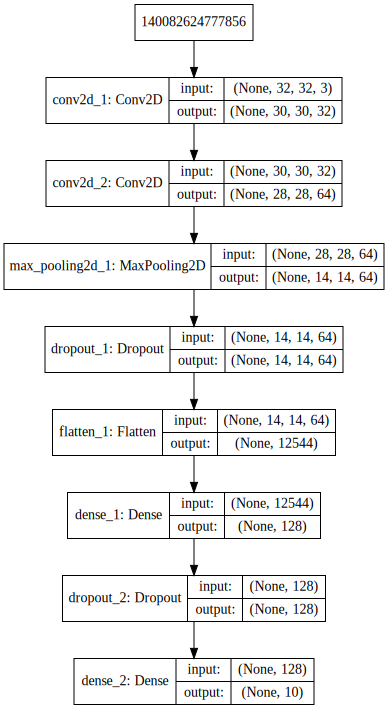

In [9]:
#Visualization of CNN arcitecture
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes=True,show_layer_names=True,rankdir='TB').create(prog='dot',format='svg'))

In [10]:
#Compile the model
model.compile(loss=losses.categorical_crossentropy,optimizer=Adadelta(),metrics=['accuracy'])


In [11]:
#Training the model
cnn=model.fit(X_train,Y_train,batch_size=128,epochs=50,verbose=1,validation_data=(X_val,Y_val),shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 111s 3ms/step - loss: 1.8346 - acc: 0.3443 - val_loss: 1.4549 - val_acc: 0.4996
Epoch 2/50
40000/40000 [==============================] - 109s 3ms/step - loss: 1.4631 - acc: 0.4848 - val_loss: 1.2395 - val_acc: 0.5604
Epoch 3/50
40000/40000 [==============================] - 109s 3ms/step - loss: 1.3166 - acc: 0.5390 - val_loss: 1.1539 - val_acc: 0.5956
Epoch 4/50
40000/40000 [==============================] - 109s 3ms/step - loss: 1.2166 - acc: 0.5736 - val_loss: 1.1181 - val_acc: 0.6112
Epoch 5/50
40000/40000 [==============================] - 107s 3ms/step - loss: 1.1411 - acc: 0.6022 - val_loss: 1.0718 - val_acc: 0.6289
Epoch 6/50
40000/40000 [==============================] - 109s 3ms/step - loss: 1.0683 - acc: 0.6271 - val_loss: 1.0578 - val_acc: 0.6313
Epoch 7/50
40000/40000 [==============================] - 110s 3ms/step - loss: 1.0033 - acc: 0.6517 - val_loss: 1.0278 - 

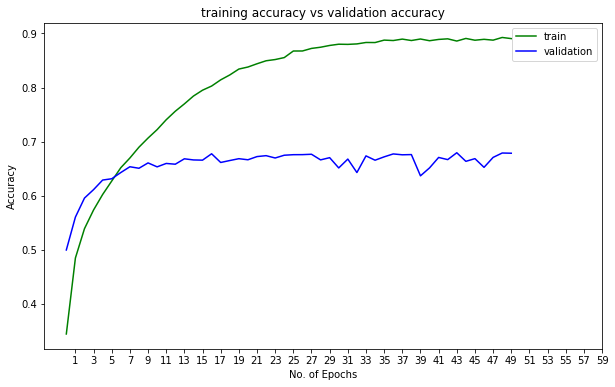

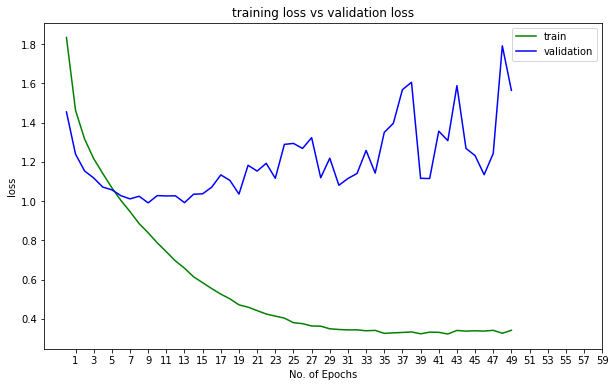

In [12]:
#Plots fro training and validation process:loss and accuracy
plt.figure(figsize=(10,6))
plt.plot(cnn.history['acc'],'g')
plt.plot(cnn.history['val_acc'],'b')
plt.xticks(np.arange(1,60,2))
plt.title('training accuracy vs validation accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','validation'])
plt.show()

plt.figure(figsize=(10,6))
plt.plot(cnn.history['loss'],'g')
plt.plot(cnn.history['val_loss'],'b')
plt.xticks(np.arange(1,60,2))
plt.title('training loss vs validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()



In [13]:
#predict the model
pred=model.predict(test_data,verbose=1)

200000/200000 [==============================] - 138s 690us/step


In [14]:
index=np.argmax(pred,axis=1)
labels=lb.classes_[index]
labels

array(['dog', 'frog', 'frog', ..., 'horse', 'truck', 'airplane'],
      dtype='<U10')